# Interpolation of data

In [37]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

$ f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n $

Here, $f^{(n)} $ is the nth derivative and $ x_0 $ is the argument around which we expand the function

### 1.1 Example: Exponential function

$ f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) $

In [38]:
def expTaylor(x, x0, nmax):
    t = 0
    for n in range(nmax+1):
        t += np.exp(x0) * (x-x0)**n / np.math.factorial(n)  
    return t

In [39]:
expTaylor(1, 0, 10)

2.7182818011463845

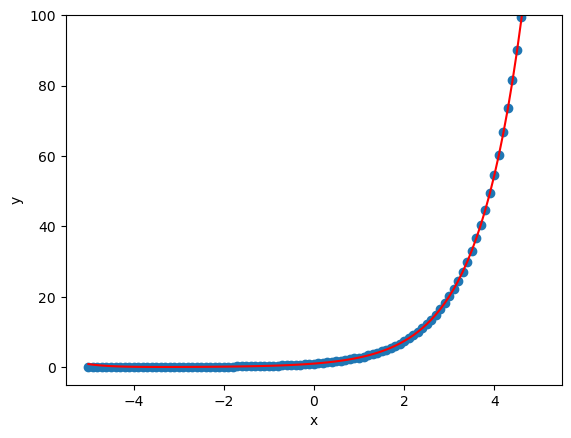

In [40]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 100])

x_list = np.linspace(-5, 5, 101)
plt.scatter(x_list, np.exp(x_list))

nmax = 10
plt.plot(x_list, expTaylor(x_list, 0, nmax), 'r')

### 1.2 Example: sin function at $x_0 = 0$

$ f(0) = f''(0) = f^{(4)}(0) = \dots = 0 $

$ f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 $

$ f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 $

$ \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1} $

In [41]:
def sinTaylor(x, nmax):
    t = 0
    for n in range(nmax+1):
        t += (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)
    return t

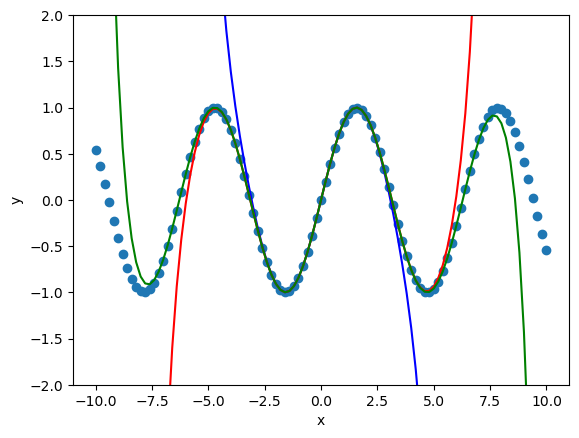

In [42]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2, 2])

x_list = np.linspace(-10, 10, 101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 3), 'b')
plt.plot(x_list, sinTaylor(x_list, 6), 'r')
plt.plot(x_list, sinTaylor(x_list, 9), 'g')

- Accuracy of $ \sin(10.5) $

In [43]:
print(f"Error: {round(np.sin(10.5) - sinTaylor(10.5, 50), 15)}")

Error: -2.84e-13


### 1.3 Implementation of a general function

Derivative: $ f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} $

In [44]:
def derivative(f, x, h=0.01):
    return (f(x+h) - f(x)) / h

In [45]:
func = lambda x: 2 * np.sin(x)**2 + x
x0 = 10.5
func(x0)

12.04772926022427

In [46]:
derivative(func, x0)

2.662245505161387

Higher derivatives: $ f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh) $

In [47]:
def nDerivative(f, x, h, n):
    t = 0
    for k in range(n+1):
        t += (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

In [48]:
print(f"Function value: {nDerivative(func, x0, h=0.01, n=0)}")
print(f"First derivative: {nDerivative(func, x0, h=0.01, n=1)}")

Function value: 12.04772926022427
First derivative: 2.662245505161387


In [49]:
def taylor(f, x, x0, nmax, h):
    t = 0
    for n in range(nmax+1):
        t += nDerivative(f, x0, h, n) * (x - x0)**n / np.math.factorial(n)
    return t

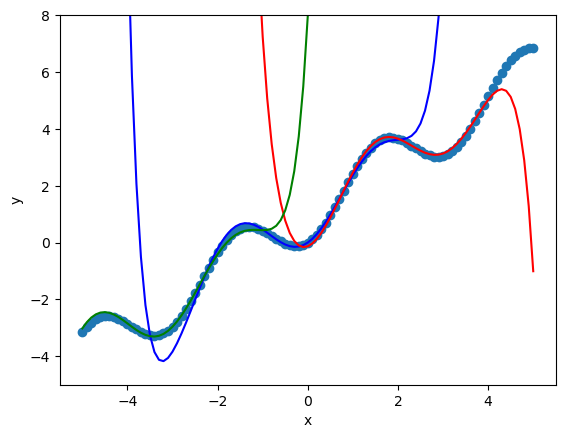

In [50]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 8])

x_list = np.linspace(-5, 5, 101)
plt.scatter(x_list, func(x_list))

h = 0.05
plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'b')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'r')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'g')

## 2. Interpolation

### 2.1 Generate data points

In [51]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

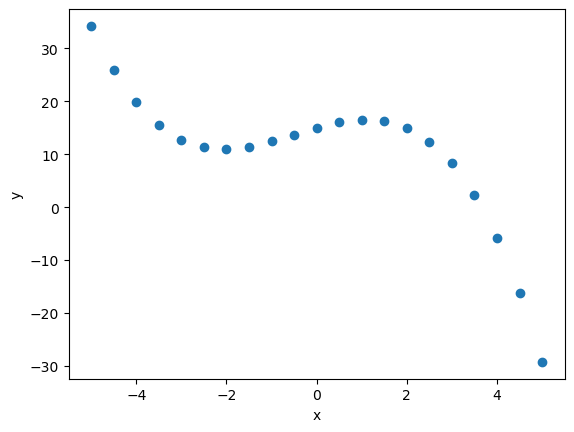

In [52]:
import numpy as np  
import matplotlib.pyplot as plt
npoints = 21
x_list = np.linspace(-5, 5, npoints)
data0 = np.array([x_list, correctFunction(x_list)])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

Modify x and y values by adding random numbers

In [53]:
0.1 * (2*np.random.rand(npoints)-1)

array([-0.00711588, -0.06757518, -0.08578118, -0.06047274,  0.09866483,
       -0.02024115, -0.094712  ,  0.07379819,  0.00556186, -0.03416571,
        0.07117501,  0.0572837 ,  0.06620315,  0.08194539, -0.02950031,
       -0.05276102, -0.00752658, -0.06903566, -0.05320345,  0.06986077,
       -0.02308361])

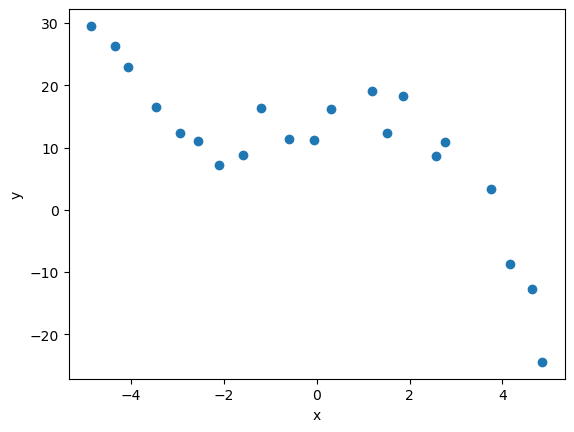

In [54]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])
plt.xlabel('x')
plt.ylabel('y')

#plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1]) # Mesaurement data to be fitted

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

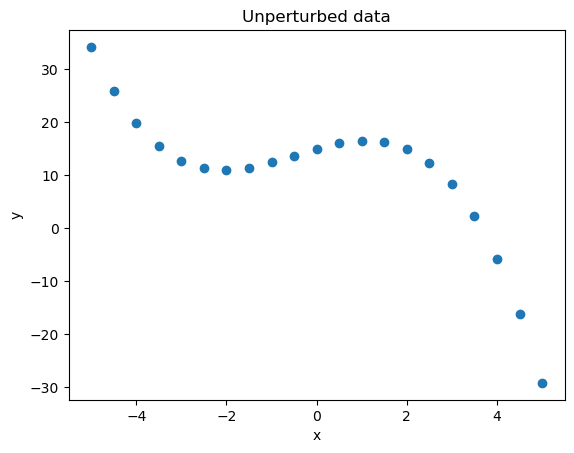

In [55]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Unperturbed data')
plt.scatter(data0[0], data0[1])

In [56]:
from scipy import interpolate

- linear splines

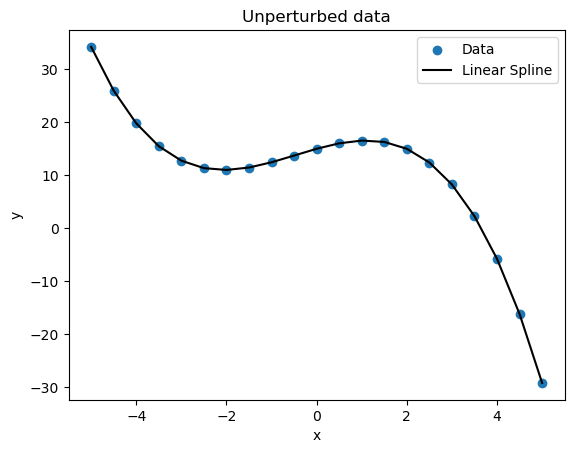

In [57]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind='linear')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Unperturbed data')
plt.scatter(data0[0], data0[1], label='Data')

plt.plot(data0[0], splineLinear0(data0[0]), 'black', label='Linear Spline')
plt.legend(loc='best')

- zoom

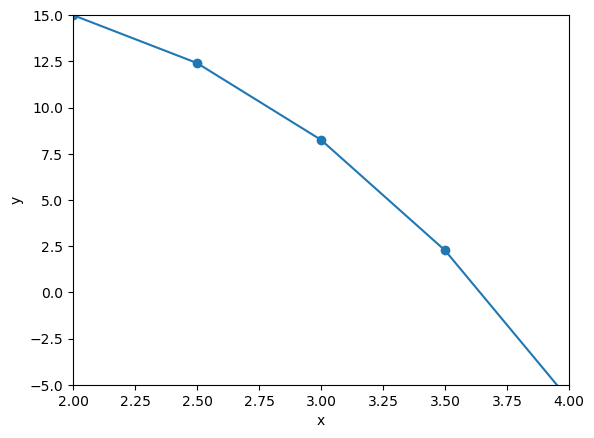

In [58]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

- cubic spline

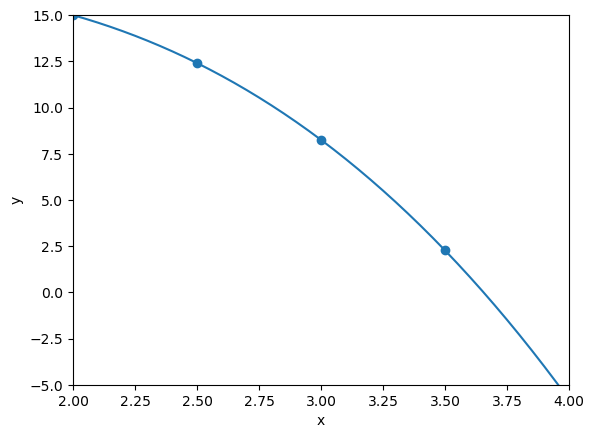

In [59]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))

### 2.2.2 Perturbed data

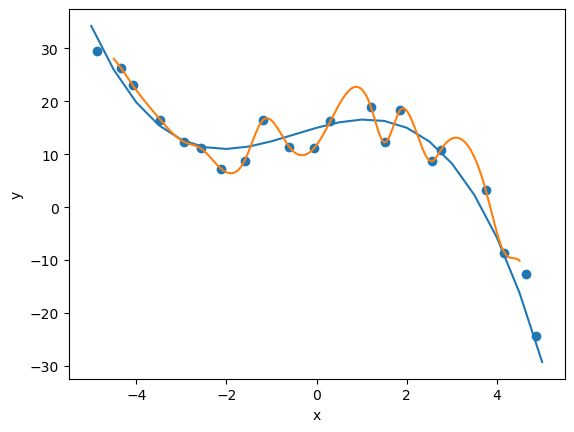

In [60]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list))

- How to handle data which is not smooth?

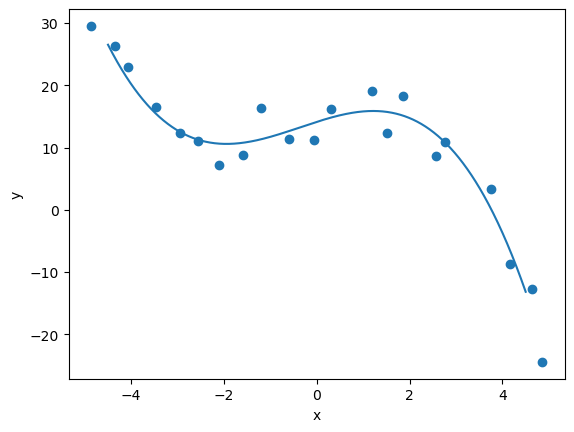

In [61]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list))

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: $ f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k $

In [62]:
def polynomialModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x**k
    return t

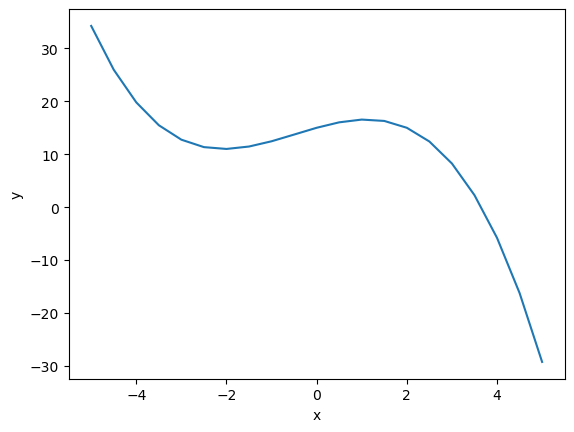

In [63]:
import numpy as np
import matplotlib.pyplot as plt
a0 = np.array([15, 2.4, -0.5, -0.35])
# a0 = np.array([1, 1, 1, 1])

plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a0))

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: $ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2 $

$ f $ is the fit function that is determined by the coefficients $ a_i $ in our case.

$ (x_i, y_i) $ are the data points that we try to fit.

In [64]:
def errorFit(f, coefficients, data):    
    error = 0
    for i in range(len(data[0])):
        error += ( data[1,i] - f( data[0,i], coefficients ))**2
        # print(error)
    return error

In [65]:
errorFit(polynomialModel, a0, data)

190.454764508491

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients $ a_i $ will be updated along the gradient direction of the error function $ \nabla_{\vec{a}} \Delta $. The gradient consists of elements $ \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k} $

In [66]:
def errorFitGradient(f, coefficients, data):    
    return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

In [67]:
errorFitGradient(polynomialModel, a0, data)

array([  -14.96985372,   -91.11164207,  -510.12075939, -1812.25566347])

### 2.3.4 Loop for the actual fitting

In [84]:
iterations = 100000
h = 0.00001 # Learning rate
a = 2*np.random.rand(4)-1

print(f"Initial coefficients: {a}")

for i in range(iterations):
    a = a - h * errorFitGradient(polynomialModel, a, data)

print(f"Final coefficients: {a}") 
print(f"Function coefficients: {a0}")

Initial coefficients: [-0.64967142 -0.22515533 -0.17411019 -0.03903134]
Final coefficients: [14.12658591  2.37383546 -0.36820514 -0.33489027]
Function coefficients: [15.    2.4  -0.5  -0.35]


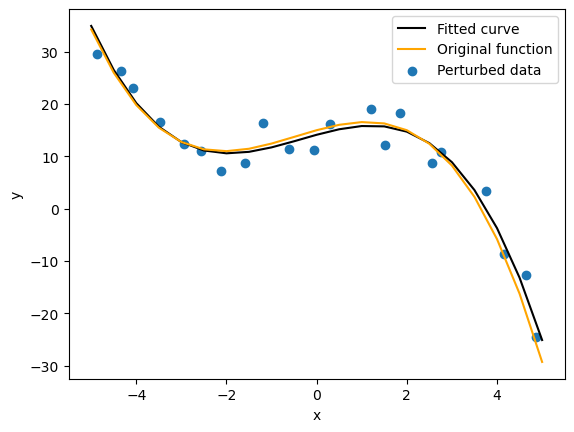

In [88]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a),'black', label='Fitted curve')
plt.plot(x_list, polynomialModel(x_list, a0),'orange', label='Original function')
plt.scatter(data[0], data[1], label='Perturbed data')
plt.legend(loc='best')

- Comparison of a and a0

In [83]:
print(a)
print(a0)

[14.12658591  2.37383546 -0.36820514 -0.33489027]
[15.    2.4  -0.5  -0.35]
